In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zad


Inne miasta - przeanalizować miasta przy użyciu PCA: ile głównych składowych, zinterpretować je, zidentyfikować wyróżniające się miasta


http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5191/assignment/assignment2.html

Dla poniższych danych 

 * znajdż optymalną ilość wymiaów i zredukuj wymiar danyc
 * ponadto zmniejsz wymiar danych do 2 i zwizualizuj dane

In [3]:
miasta = pd.read_csv("datasets/places.txt",sep="\s+",header=0)
miasta = dane.iloc[:,range(9)]
miasta.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


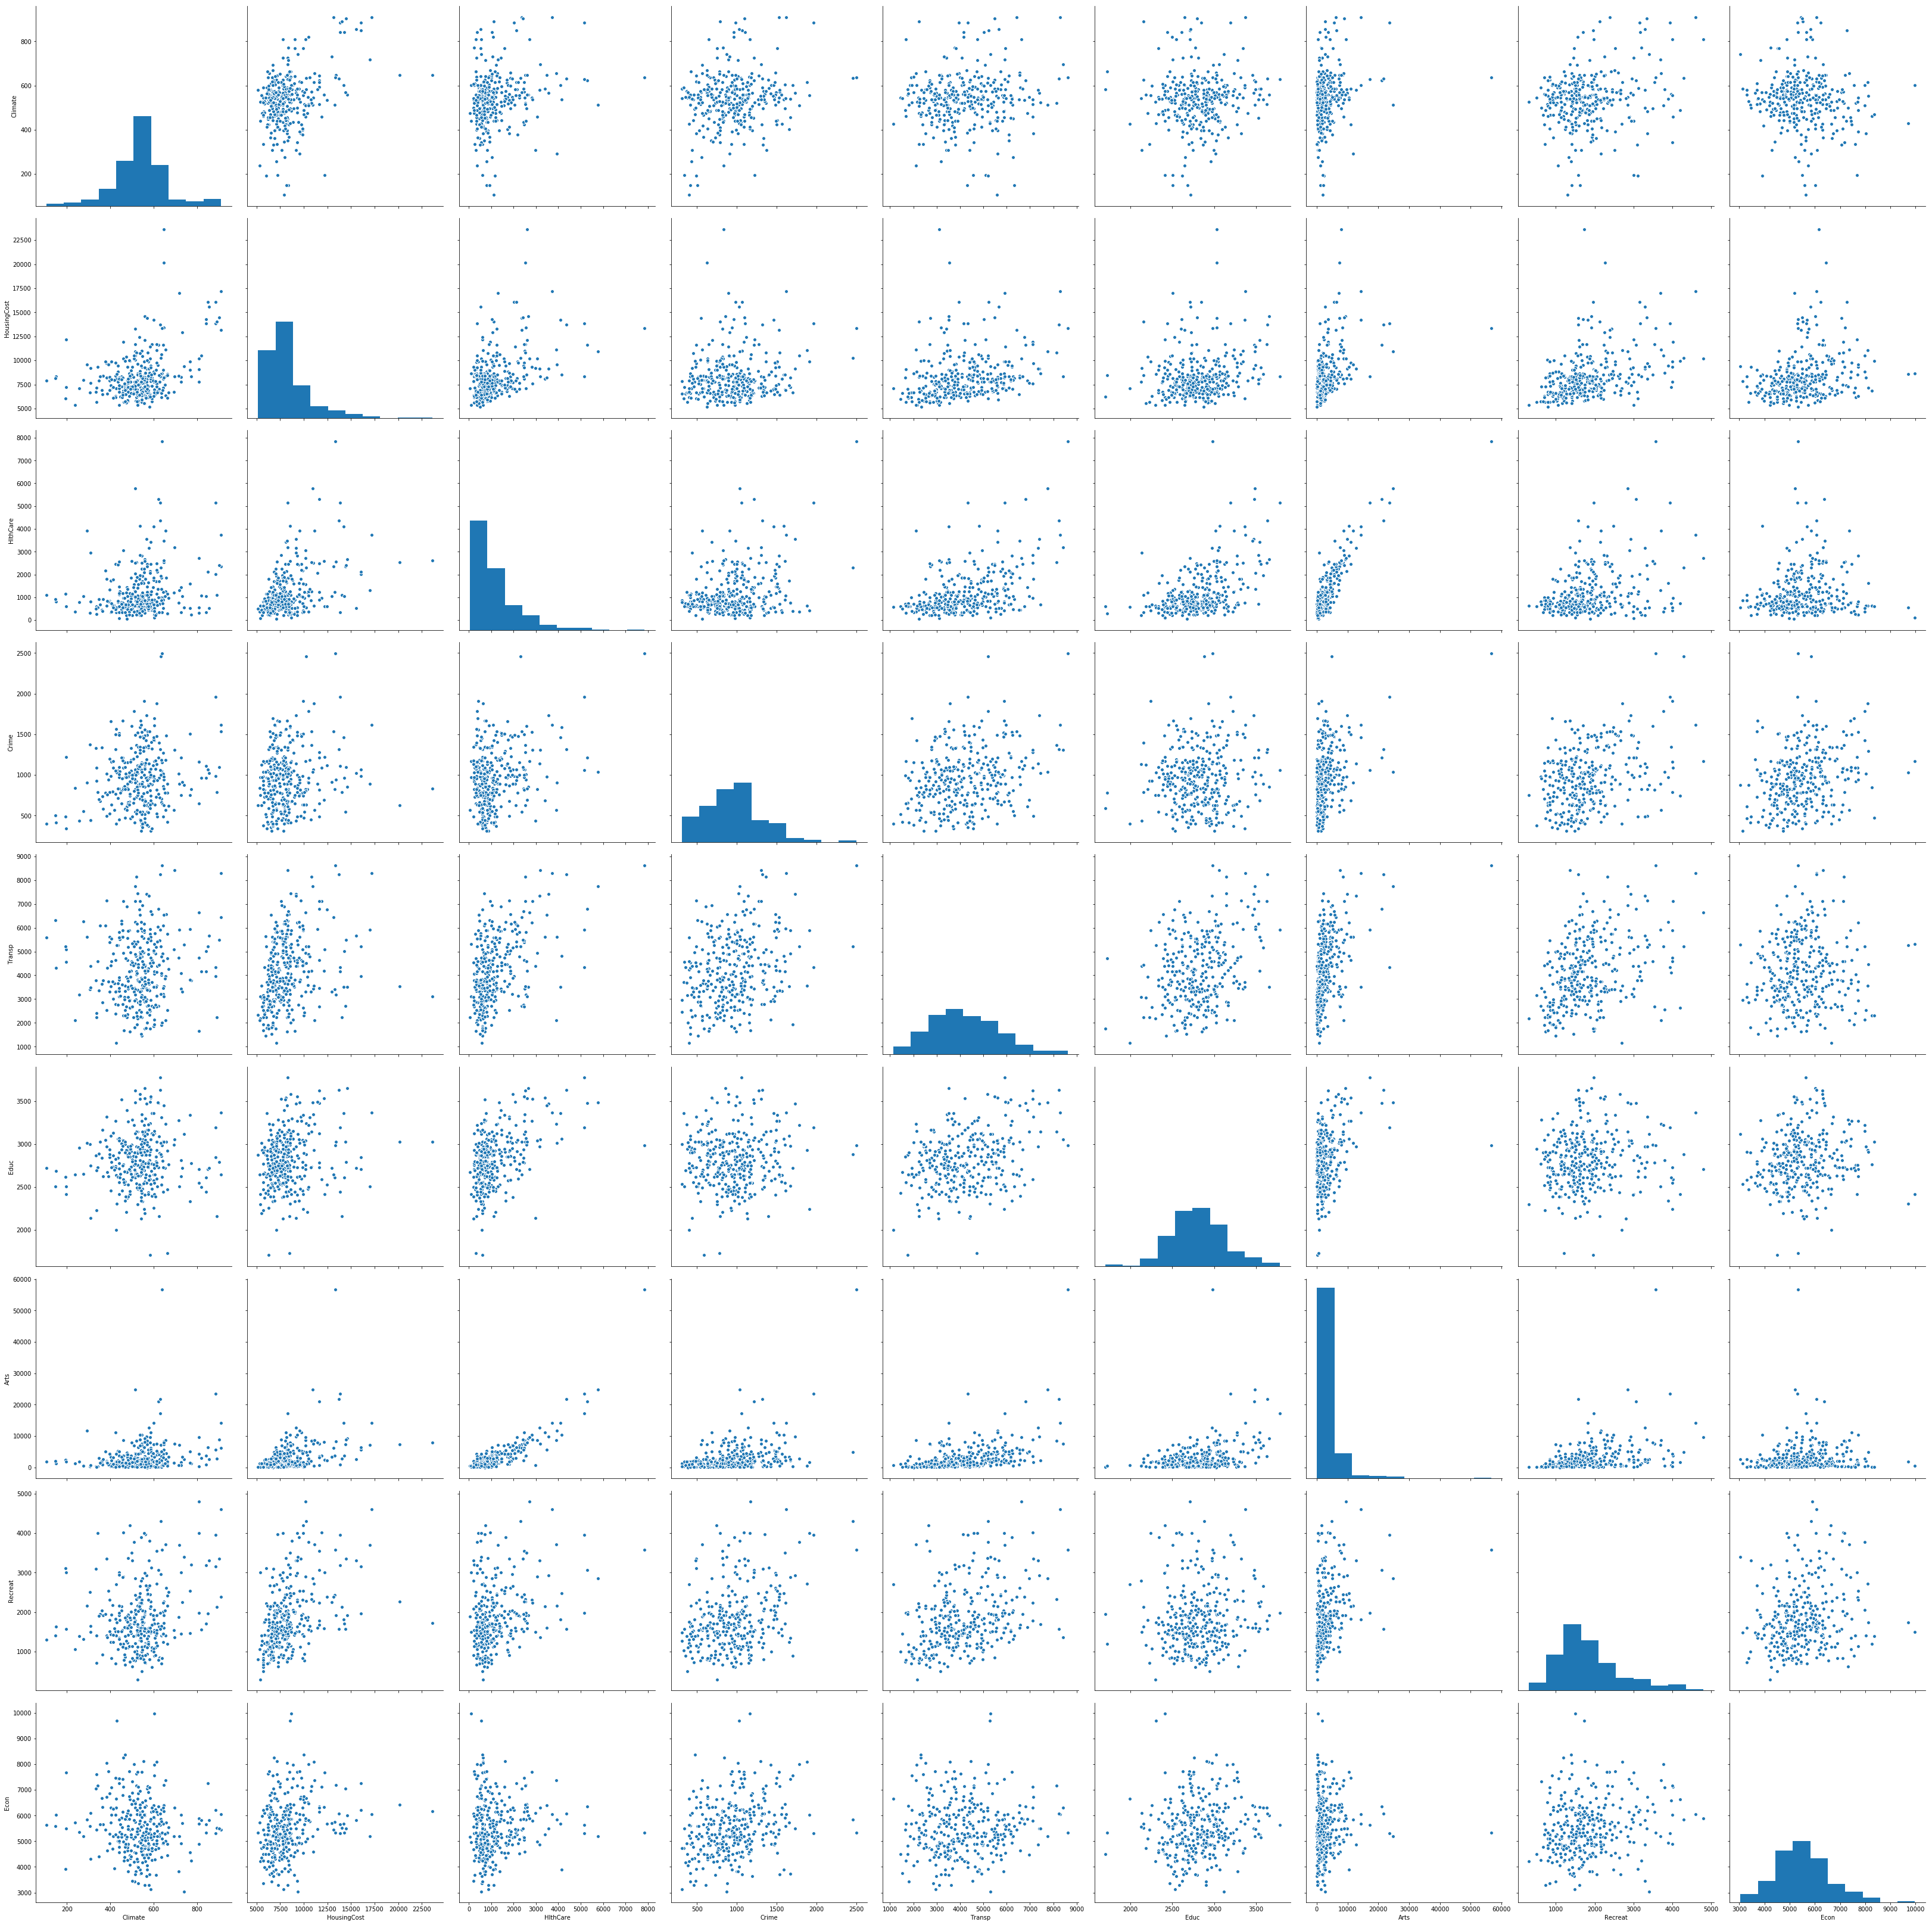

In [4]:
sns.pairplot(data=miasta, size=5)
plt.show()

In [5]:
y = np.array(miasta.index)
X = miasta.values

In [6]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


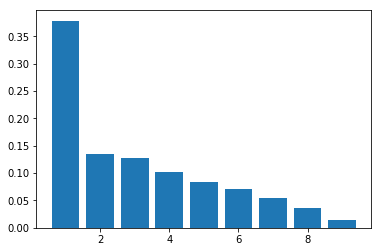

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)
plt.bar(range(1,1+pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [8]:
pca.explained_variance_ratio_

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

## Odpowiedź: ?? wymiary są wystarczające

# Zad
Zwizualizuj dane w 2D

In [9]:
pca_2 = PCA(2)
X_std_2 = pca_2.fit_transform(X_std)

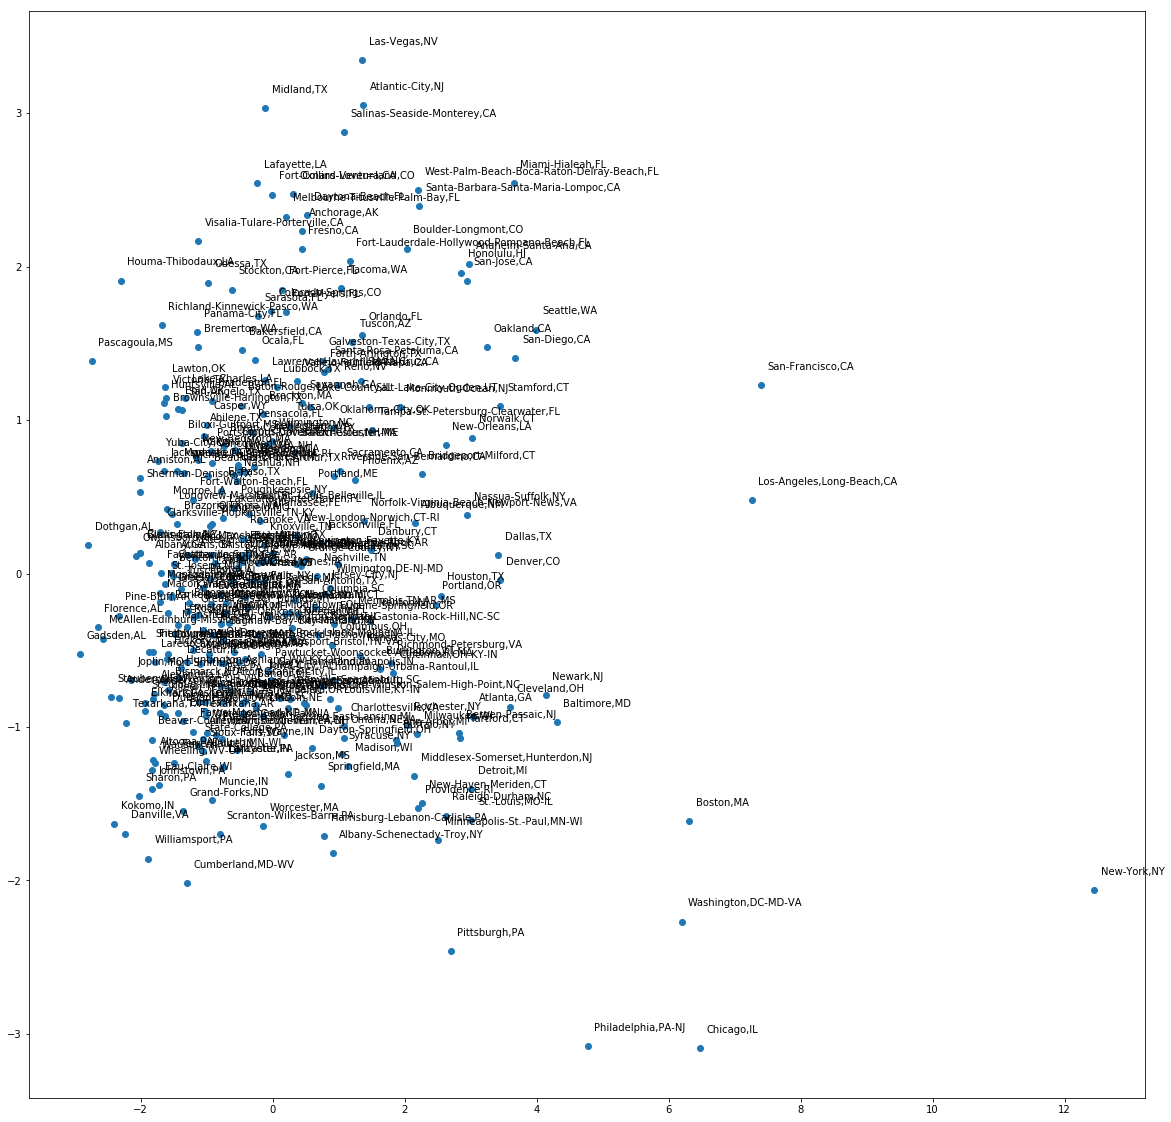

In [11]:
plt.figure(figsize=(20,20))
plt.scatter(X_std_2[:,0],X_std_2[:,1])#, c = y)
for i in range(X_std_2.shape[0]):
    plt.annotate(y[i],xy=(X_std_2[i,0],X_std_2[i,1]), xytext = (X_std_2[i,0]+0.1,X_std_2[i,1]+0.1))
plt.show()